In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('/content/Housing.csv')
df.head()
df.describe()
print(df)
X = df[['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','furnishingstatus' ]]
y = df['price']
df.isnull().sum()#checking for null values

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

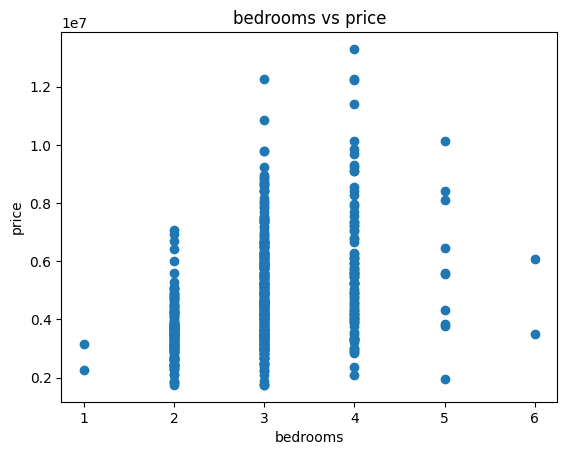

In [101]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('bedrooms vs price')
plt.show()

<ipython-input-102-5307e71d230d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


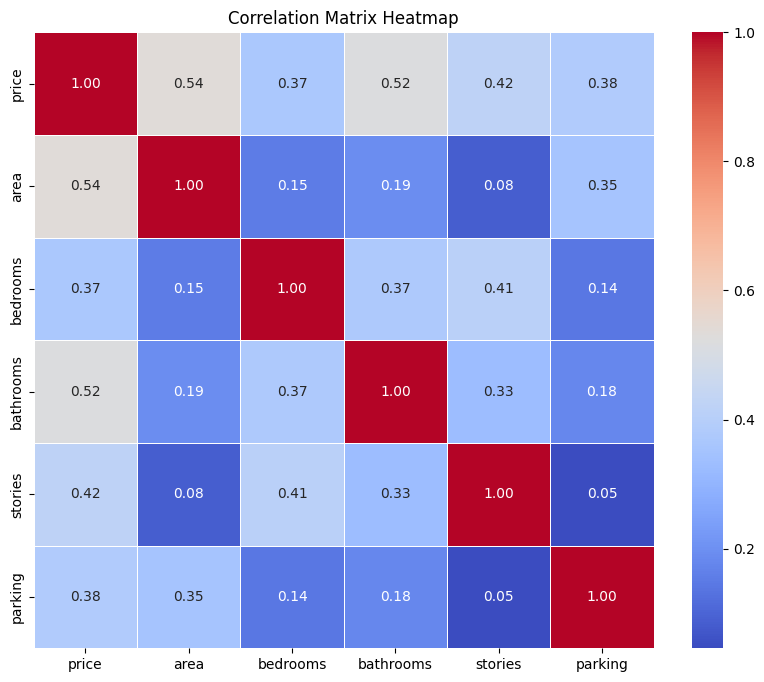

In [102]:
# Calculate the correlation matrix to understand how each feature is correlated.
corr_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [75]:
train_X,test_X,train_y,test_y = train_test_split(X , y, train_size = 0.8, random_state = 42)
model = LinearRegression(fit_intercept=False)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)
#one hot encoding to convert categorical values to numerical values
model.fit(train_X,train_y)

LinearRegression(fit_intercept=False)

In [85]:
print(train_y)
print(train_X)
print(test_X)
predicts = model.predict(test_X)
df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predicts})

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64
     bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
46          3          2        4        1            0             1   
93          3          2        1        3            0             1   
335         2          1        1        2            0             1   
412         3          1        2        0            0             1   
471         3          1        2        0            0             1   
..        ...        ...      ...      ...          ...           ...   
71          4          2        4        0            0             1   
106         4          2        1        0            0             1   
270         3          2        3        1            0             1   
435         2          1        1        0            0           

In [86]:
#evaluating the model using root mean squared and r2
rmse = np.sqrt(mean_squared_error(test_y, predicts))
r2 = r2_score(test_y, predicts)
print(rmse)
print(r2)

1412486.22508344
0.6052844774514042


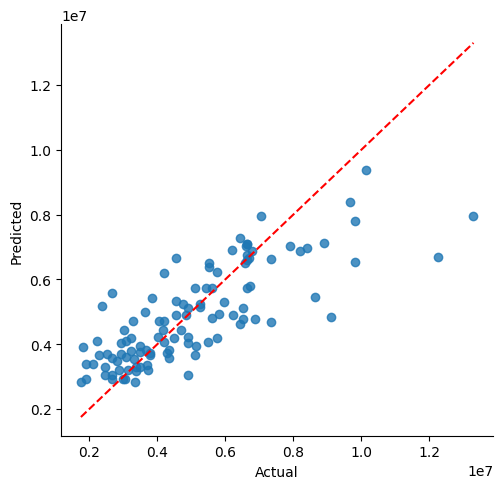

In [89]:
#to check the linear relationship between predicted and actual values
#Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)#fit_reg = false This parameter indicates that we don't want to fit a regression line
#Plot the diagonal line
d_line= np.arange(df_results.min().min(), df_results.max().max())#This creates an array of values ranging from the minimum of the minimum value in df_results to the maximum of the maximum value in df_results.
#.arange creates an array of equidistant points
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()
#ideally the points show lie around the diagonal line

In [96]:
#testing on new data
new_data = [[7500, 2, 1, 2, 1, 1, 0, 0, 1,1, 0, 0, 1, 0, 1, 0, 1, 1, 1]]
predicted_price = model.predict(new_data)
print( predicted_price[0])

1011688219.5441836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
